In [1]:
# Import packages
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Load data
neighbourhoods = gpd.read_file("../shapefiles/ONS/ons.shp")
neighbourhoods.head()

,FID,flag,ONS_ID,Name,POPEST,Name_FR,Shape__Are,Shape__Len,geometry
0,1,0,938,Old Barrhaven West,16880,Old Barrhaven Ouest,1.030476e+07,15745.394276,"POLYGON ((-75.77100 45.26216, -75.77364 45.260..."
1,2,1,3,Beacon Hill South - Cardinal Heights,7195,Beacon Hill Sud - Cardinal Heights,4.533907e+06,10362.452308,"POLYGON ((-75.58543 45.44887, -75.58545 45.448..."
2,3,0,902,Beaverbrook,6715,None,5.744251e+06,10135.952452,"POLYGON ((-75.90837 45.33448, -75.90828 45.334..."
3,4,1,6,Bells Corners East,4729,Bells Corners Est,6.786858e+06,11170.923795,"POLYGON ((-75.80921 45.33091, -75.80895 45.330..."
4,5,1,7,Bells Corners West,4158,Bells Corners Ouest,2.772272e+06,7467.061209,"POLYGON ((-75.82832 45.31327, -75.82823 45.313..."


In [3]:
# Load more data
hospitals = gpd.read_file("../shapefiles/OttawaHospitals/Hospitals.shp")
hospitals.head()

,OBJECTID,ID,NAME,ADDRESS,PHONE,LINK_LABEL,LINK_EN,LINK_DESCR,LINK_LAB_1,LINK_FR,GLOBALID,ADDRESS_FR,NAME_FR,geometry
0,1,1,Royal Ottawa Hospital,1145 Carling Avenue,722-6521,None,http://www.theroyal.ca/,None,None,http://www.leroyal.ca/,{E279DD71-C8D3-4C76-B317-1ACF4DB9281A},"1145, avenue Carling",Hôpital Royal Ottawa,POINT Z (-75.73236 45.38809 0.00000)
1,2,2,Ottawa Hospital - Civic Campus,1053 Carling Avenue,761-4000,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{C1661EEA-B6C5-4C11-9789-E5353940777A},"1053, avenue Carling",Hôpital d’Ottawa – Campus Civic,POINT Z (-75.72121 45.39267 0.00000)
2,3,3,Ottawa Hospital - Riverside Campus,1967 Riverside Drive,738-7100,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{7A30AEC4-D042-41D6-9CF1-D06F6202137F},"1967, promenade Riverside","Hôpital d’Ottawa, campus Riverside",POINT Z (-75.66794 45.39675 0.00000)
3,4,4,Children's Hospital of Eastern Ontario,401 Smyth Road,737-7600,None,http://www.cheo.on.ca/,None,None,http://www.cheo.on.ca/fr/home,{93E3EACA-FB11-49E9-A914-0D5E8B5CBF7B},"401, chemin Smyth",Centre hospitalier pour enfants de l'est de l'Ont,POINT Z (-75.65192 45.40102 0.00000)
4,5,5,Ottawa Hospital - General Campus,501 Smyth Road,737-7777,None,https://www.ottawahospital.on.ca/,None,None,https://www.ottawahospital.on.ca/,{CC861544-A63C-4A64-89DA-65BC7274827E},"501, chemin Smyth",Hôpital d’Ottawa – Campus Général,POINT Z (-75.64764 45.40099 0.00000)


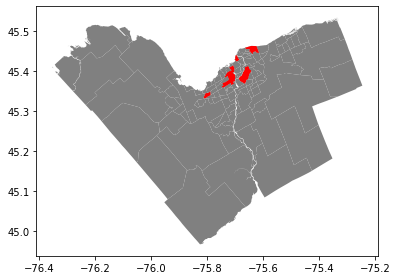

In [4]:
# Plot data
fig, ax = plt.subplots()
# Make all the ONS polygons gray so that red highlighted polygons pop out more
neighbourhoods.plot(ax=ax, facecolor='gray');
# Go through each hospital by geometry
for h in hospitals.geometry:
    # Now go through each neighbourhood by name 
    # We have to intersect using nx or else the interpreter gets mad
    for n in neighbourhoods.Name:
        # Find the feature matching the name
        nx = neighbourhoods[neighbourhoods.Name == n]
        # See if the neighbourhood intersects with a hospital
        if(nx.geometry.intersects(h).any() == True):
            # If a neighbourhood has a hospital, color it's polygon red
            nx.plot(ax=ax, facecolor='red')
plt.tight_layout();